In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [4]:
df = pd.read_csv("yield_df.csv")

In [5]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [8]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [10]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [11]:
df.duplicated().sum()

2310

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.duplicated().sum()

0

In [15]:
df.shape

(25932, 7)

In [17]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [19]:
print(df.dtypes)

Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object


In [20]:
df.select_dtypes(include=[np.number]).corr()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


## Data Visualization

In [46]:
print("=== CHECKING FOR DUPLICATE/SIMILAR NAMES IN AREA COLUMN (ALL DATA) ===")

# 1. Get all unique area names
all_areas = df['Area'].unique()
print(f"Total unique area names: {len(all_areas)}")
print(f"Total records: {len(df)}")

=== CHECKING FOR DUPLICATE/SIMILAR NAMES IN AREA COLUMN (ALL DATA) ===
Total unique area names: 101
Total records: 25932


In [47]:
# 2. Display all area names alphabetically
print("\nAll area names (alphabetically):")
print(sorted(all_areas))


All area names (alphabetically):
['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senega

In [48]:
# 3. Check for exact duplicates (case-sensitive)
print("\n=== EXACT DUPLICATES (CASE-SENSITIVE) ===")
exact_duplicates = df['Area'][df['Area'].duplicated(keep=False)].unique()
if len(exact_duplicates) > 0:
    print(f"Exact duplicates found: {len(exact_duplicates)}")
    for area in exact_duplicates:
        count = (df['Area'] == area).sum()
        print(f"  '{area}': {count} records")


=== EXACT DUPLICATES (CASE-SENSITIVE) ===
Exact duplicates found: 101
  'Albania': 99 records
  'Algeria': 114 records
  'Angola': 164 records
  'Argentina': 368 records
  'Armenia': 63 records
  'Australia': 966 records
  'Austria': 96 records
  'Azerbaijan': 116 records
  'Bahamas': 67 records
  'Bahrain': 29 records
  'Bangladesh': 147 records
  'Belarus': 63 records
  'Belgium': 39 records
  'Botswana': 64 records
  'Brazil': 1854 records
  'Bulgaria': 138 records
  'Burkina Faso': 184 records
  'Burundi': 207 records
  'Cameroon': 230 records
  'Canada': 552 records
  'Central African Republic': 161 records
  'Chile': 230 records
  'Colombia': 414 records
  'Croatia': 105 records
  'Denmark': 50 records
  'Dominican Republic': 368 records
  'Ecuador': 621 records
  'Egypt': 322 records
  'El Salvador': 184 records
  'Eritrea': 80 records
  'Estonia': 42 records
  'Finland': 46 records
  'France': 138 records
  'Germany': 270 records
  'Ghana': 155 records
  'Greece': 161 records


In [50]:
# 4. Check for case-insensitive duplicates
print("\n=== CASE-INSENSITIVE DUPLICATES ===")
areas_lower = df['Area'].str.lower()
case_duplicates = areas_lower[areas_lower.duplicated(keep=False)].unique()

if len(case_duplicates) > 0:
    print(f"Potential case-insensitive duplicates: {len(case_duplicates)}")
    for area_lower in case_duplicates:
        # Find all variations of this area name
        variations = df['Area'][areas_lower == area_lower].unique()
        if len(variations) > 1:
            print(f"  '{area_lower}': {variations}")
else:
    print("No case-insensitive duplicates found")


=== CASE-INSENSITIVE DUPLICATES ===
Potential case-insensitive duplicates: 101


In [52]:
print("\n=== SIMILAR NAMES (FUZZY MATCHING) ===")
from difflib import get_close_matches

similar_groups = {}
checked_areas = set()

for area in all_areas:
    if area not in checked_areas:
        # Find similar names (85% similarity threshold)
        similar = get_close_matches(area, all_areas, n=10, cutoff=0.85)
        if len(similar) > 1:
            similar_groups[area] = similar
            checked_areas.update(similar)

if similar_groups:
    print(f"Similar name groups found: {len(similar_groups)}")
    for main_area, similar_areas in similar_groups.items():
        print(f"\nGroup: {main_area}")
        for similar_area in similar_areas:
            if similar_area != main_area:
                count = (df['Area'] == similar_area).sum()
                print(f"  - '{similar_area}': {count} records")
else:
    print("No similar names found")


=== SIMILAR NAMES (FUZZY MATCHING) ===
Similar name groups found: 1

Group: Australia
  - 'Austria': 96 records


In [56]:
print("\n=== POTENTIAL TYPOS/SPECIAL CHARACTERS ===")
import re

suspicious_areas = []
for area in all_areas:
    # Check for non-alphabetic characters (except spaces and hyphens)
    if re.search(r'[^a-zA-Z\s\-]', area):
        suspicious_areas.append(area)
    # Check for very short names (likely typos)
    elif len(area.strip()) < 3:
        suspicious_areas.append(area)

if suspicious_areas:
    print("Potential typos/special characters:")
    for area in suspicious_areas:
        count = (df['Area'] == area).sum()
        print(f"  '{area}': {count} records")
else:
    print("No obvious typos found")


=== POTENTIAL TYPOS/SPECIAL CHARACTERS ===
No obvious typos found


In [57]:
print("\n=== SUMMARY ===")
print(f"Total unique area names: {len(all_areas)}")
print(f"Countries with most records:")
top_countries = df['Area'].value_counts().head(10)
for country, count in top_countries.items():
    print(f"  {country}: {count} records")


=== SUMMARY ===
Total unique area names: 101
Countries with most records:
  India: 3384 records
  Brazil: 1854 records
  Mexico: 1280 records
  Australia: 966 records
  Pakistan: 966 records
  Indonesia: 816 records
  Japan: 784 records
  Turkey: 625 records
  Ecuador: 621 records
  Canada: 552 records


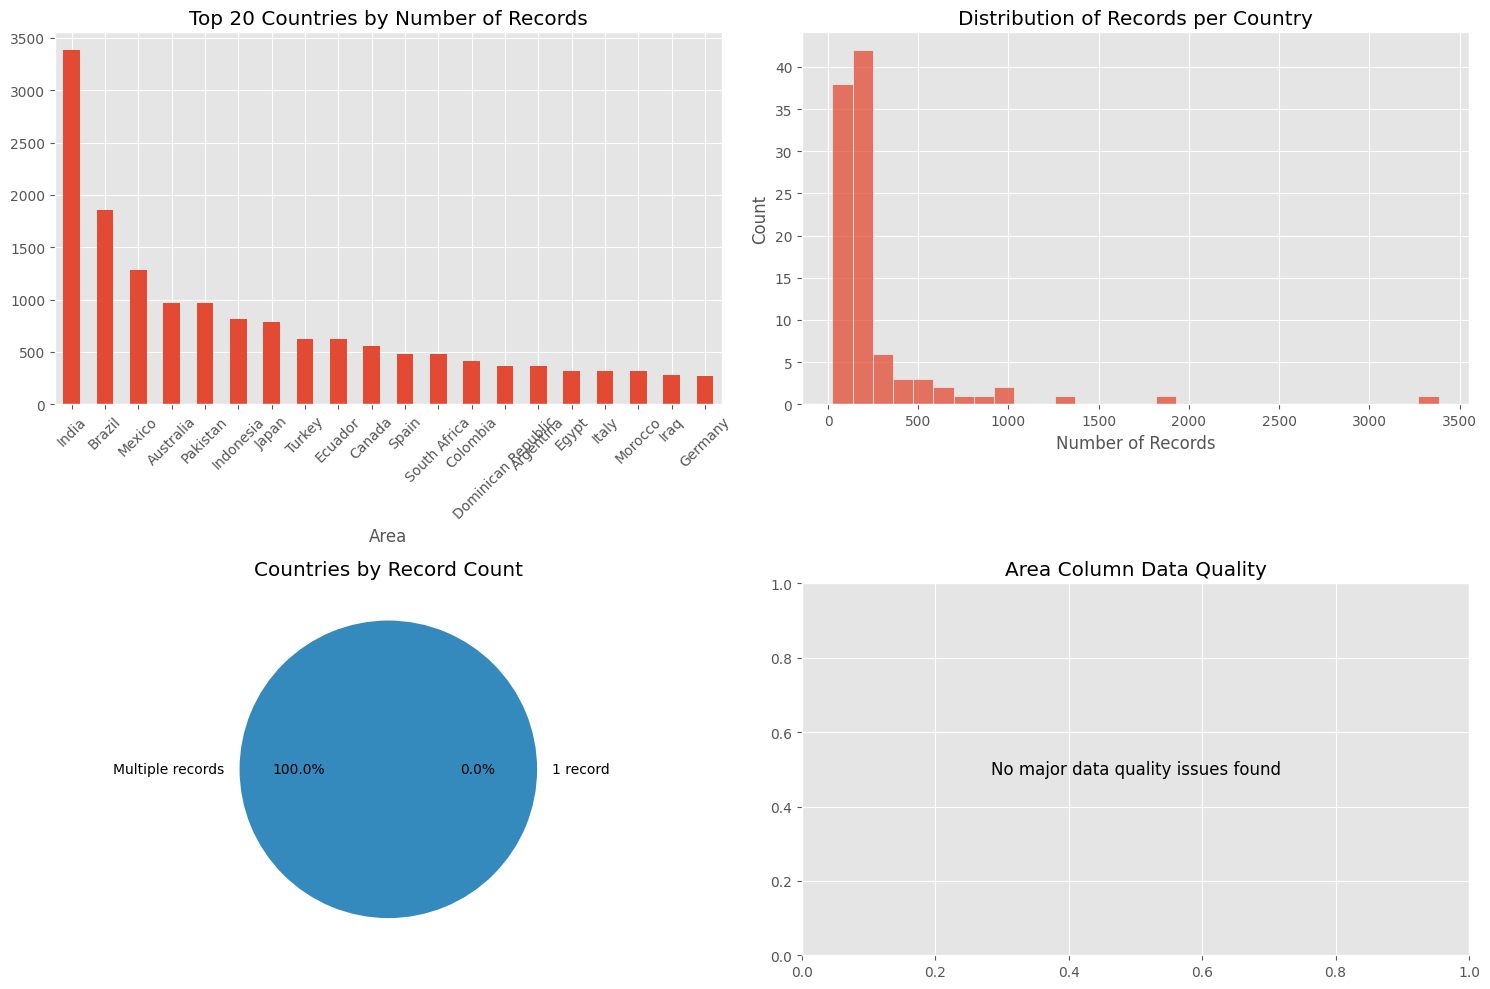


=== DATA QUALITY ASSESSMENT COMPLETE ===


In [58]:
# 8. Visualization of data distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['Area'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Countries by Number of Records')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
record_counts = df['Area'].value_counts()
sns.histplot(record_counts, bins=30)
plt.title('Distribution of Records per Country')
plt.xlabel('Number of Records')

plt.subplot(2, 2, 3)
# Countries with only 1 record
single_record_countries = (record_counts == 1).sum()
multiple_record_countries = (record_counts > 1).sum()
plt.pie([single_record_countries, multiple_record_countries], 
        labels=['1 record', 'Multiple records'], 
        autopct='%1.1f%%')
plt.title('Countries by Record Count')

plt.subplot(2, 2, 4)
# Show areas with potential issues
if suspicious_areas:
    issue_counts = [len(exact_duplicates), len(case_duplicates), len(similar_groups), len(suspicious_areas)]
    issue_labels = ['Exact Dup', 'Case Dup', 'Similar', 'Typos']
    plt.bar(issue_labels, issue_counts)
    plt.title('Data Quality Issues in Area Column')
else:
    plt.text(0.5, 0.5, 'No major data quality issues found', 
             ha='center', va='center', fontsize=12)
    plt.title('Area Column Data Quality')

plt.tight_layout()
plt.show()

print(f"\n=== DATA QUALITY ASSESSMENT COMPLETE ===")

In [24]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [23]:
len(df['Area'].unique())

101

In [25]:
len(df['Item'].unique())

10

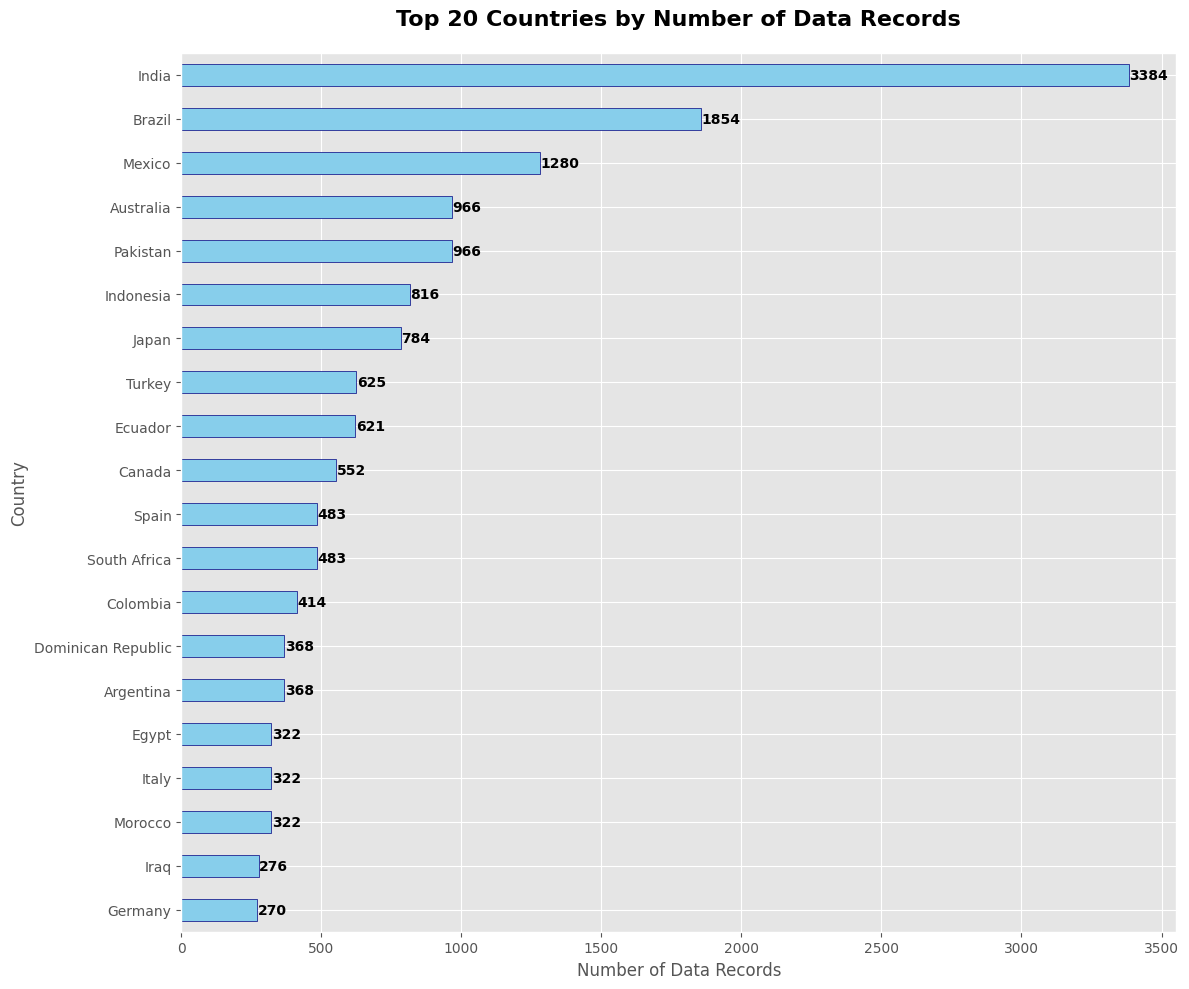

In [68]:
# Top 20 countries by number of data records
plt.figure(figsize=(12,10))
top_20_countries = df['Area'].value_counts().head(20)

top_20_countries.plot(kind='barh', color='skyblue', edgecolor='navy')
plt.title('Top 20 Countries by Number of Data Records', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Data Records', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add value labels on the bars
for i, v in enumerate(top_20_countries):
    plt.text(v + 2, i, f'{v}', va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()  # Highest count at top
plt.tight_layout()
plt.show()

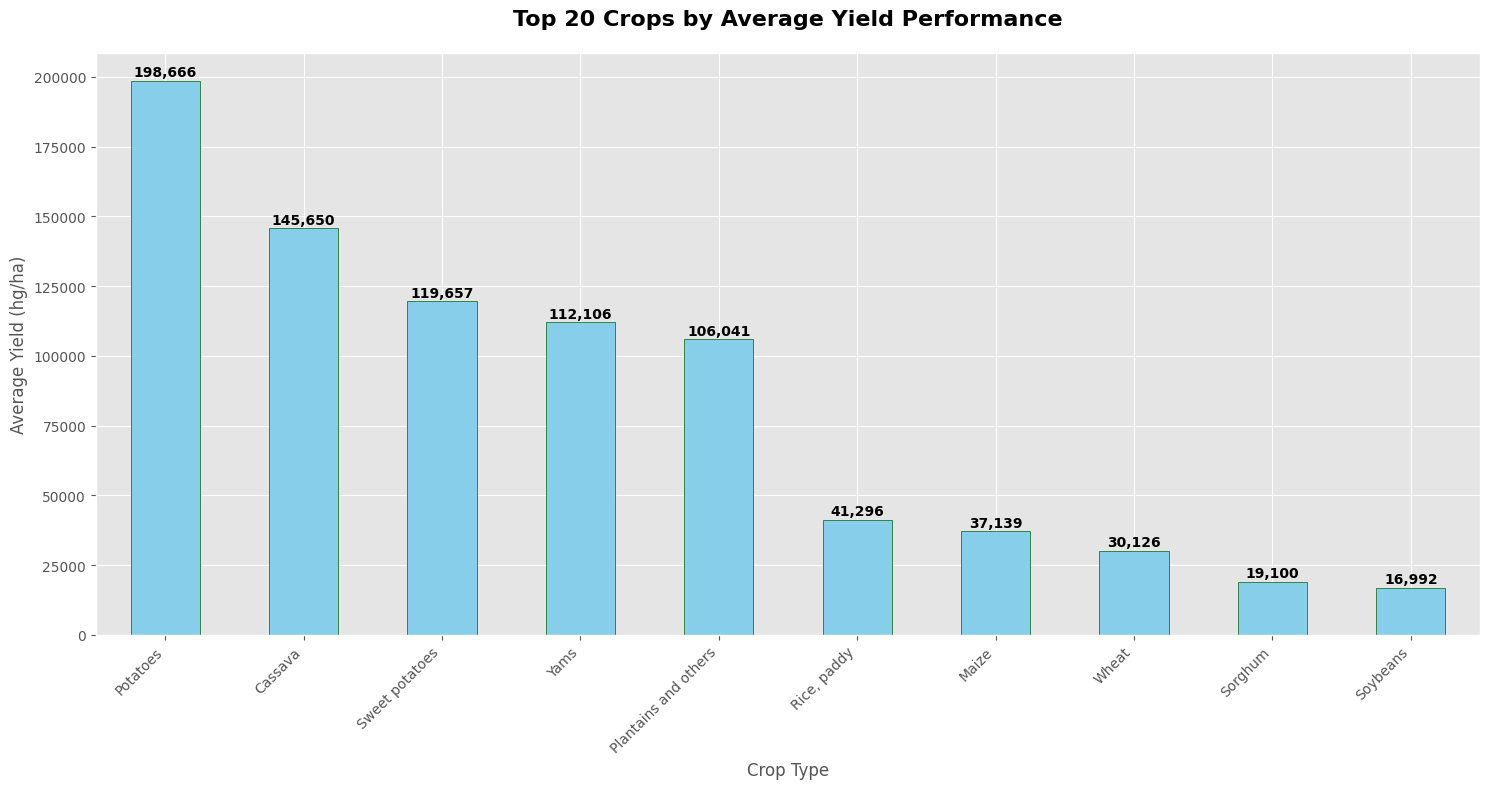

In [76]:
# Top 20 crops by average yield
plt.figure(figsize=(15,8))
top_yield_crops = df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).head(20)

top_yield_crops.plot(kind='bar', color='skyblue', edgecolor='darkgreen')
plt.title('Top 20 Crops by Average Yield Performance', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Average Yield (hg/ha)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, v in enumerate(top_yield_crops):
    plt.text(i, v + 500, f'{v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

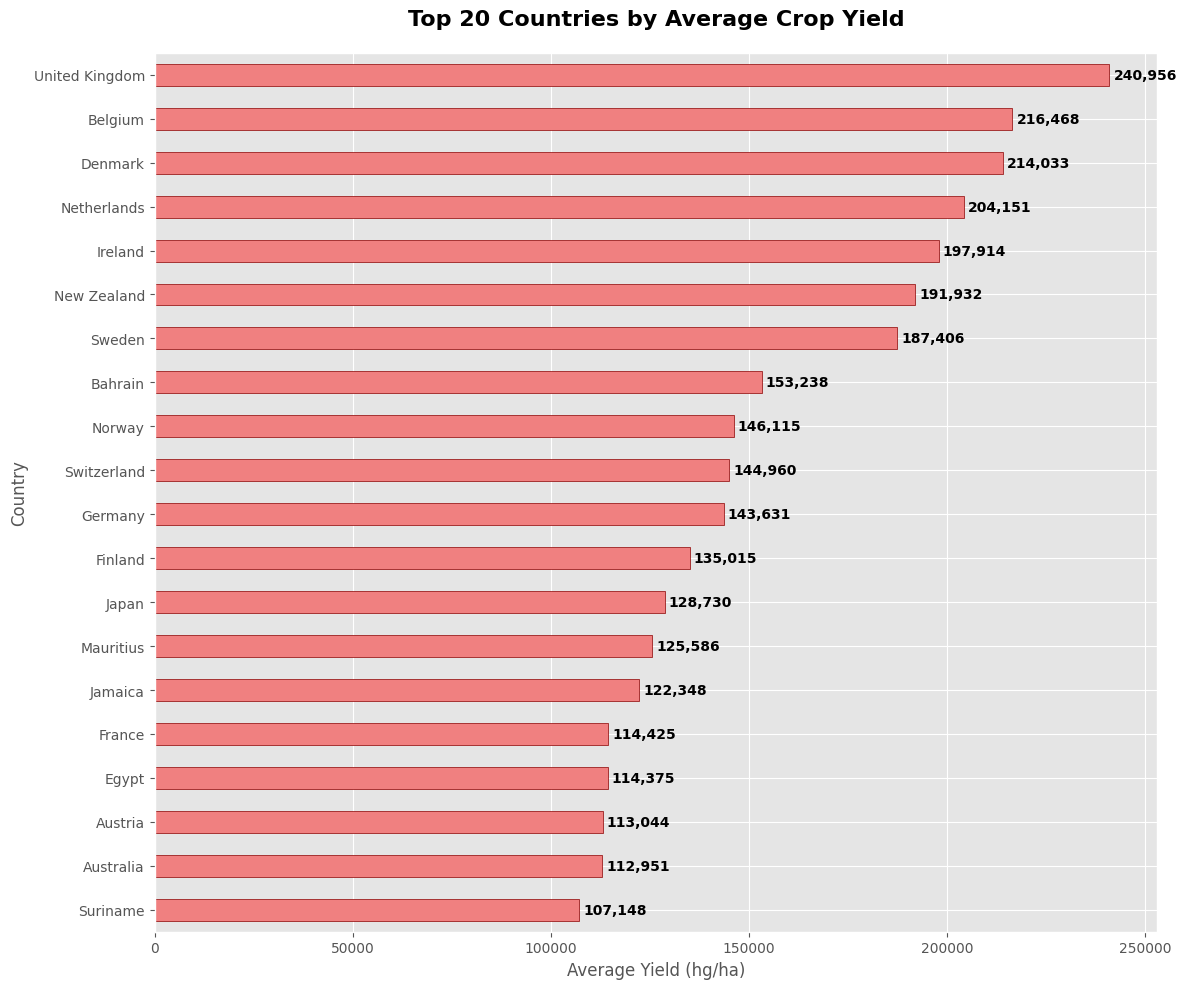

In [67]:
# Top 20 countries by average yield
plt.figure(figsize=(12,10))
top_20_yield = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(20)

top_20_yield.plot(kind='barh', color='lightcoral', edgecolor='darkred')
plt.title('Top 20 Countries by Average Crop Yield', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Yield (hg/ha)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add value labels on the bars
for i, v in enumerate(top_20_yield):
    plt.text(v + 1000, i, f'{v:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()  # Highest yield at top
plt.tight_layout()
plt.show()

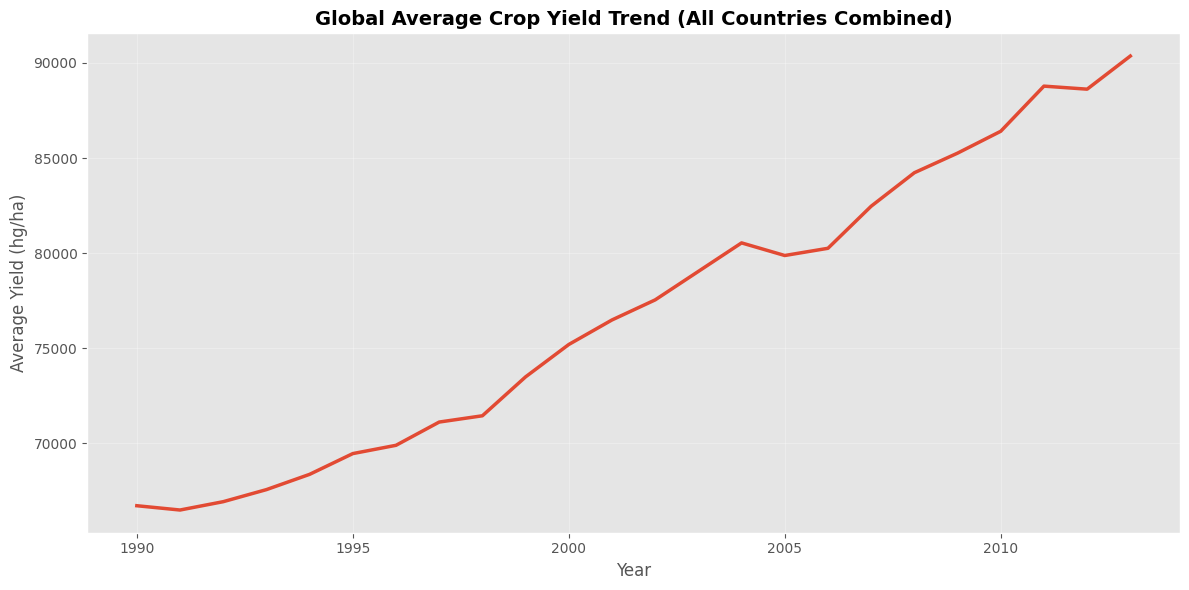

In [69]:
plt.figure(figsize=(12,6))
df.groupby('Year')['hg/ha_yield'].mean().plot(linewidth=2.5)
plt.title("Global Average Crop Yield Trend (All Countries Combined)", fontsize=14, fontweight='bold')
plt.ylabel("Average Yield (hg/ha)")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

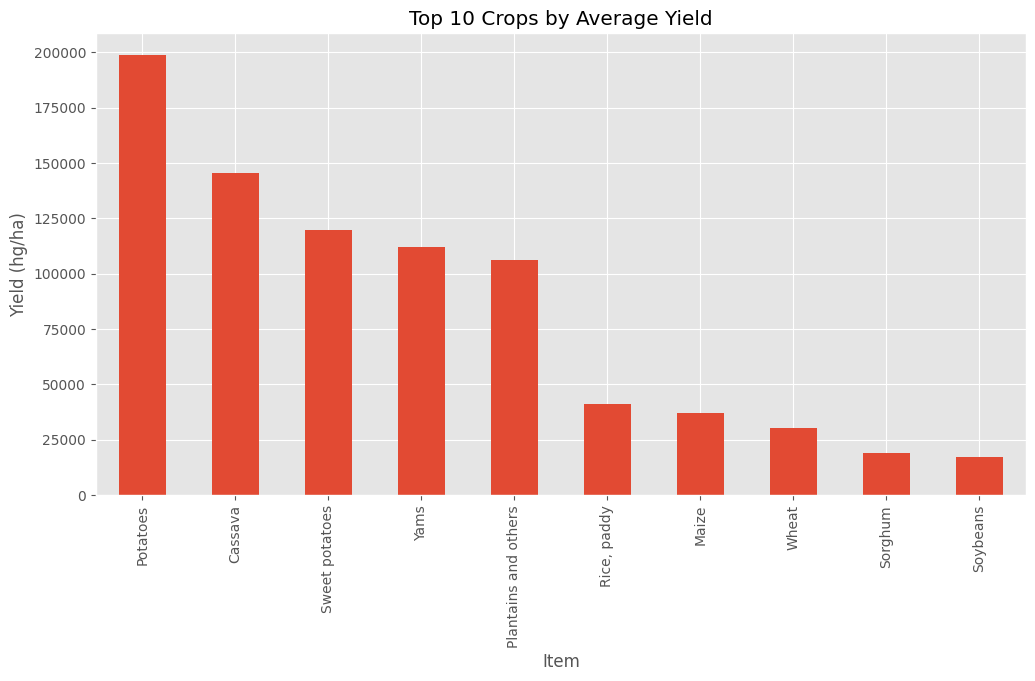

In [40]:
plt.figure(figsize=(12,6))
df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Crops by Average Yield")
plt.ylabel("Yield (hg/ha)")
plt.show()

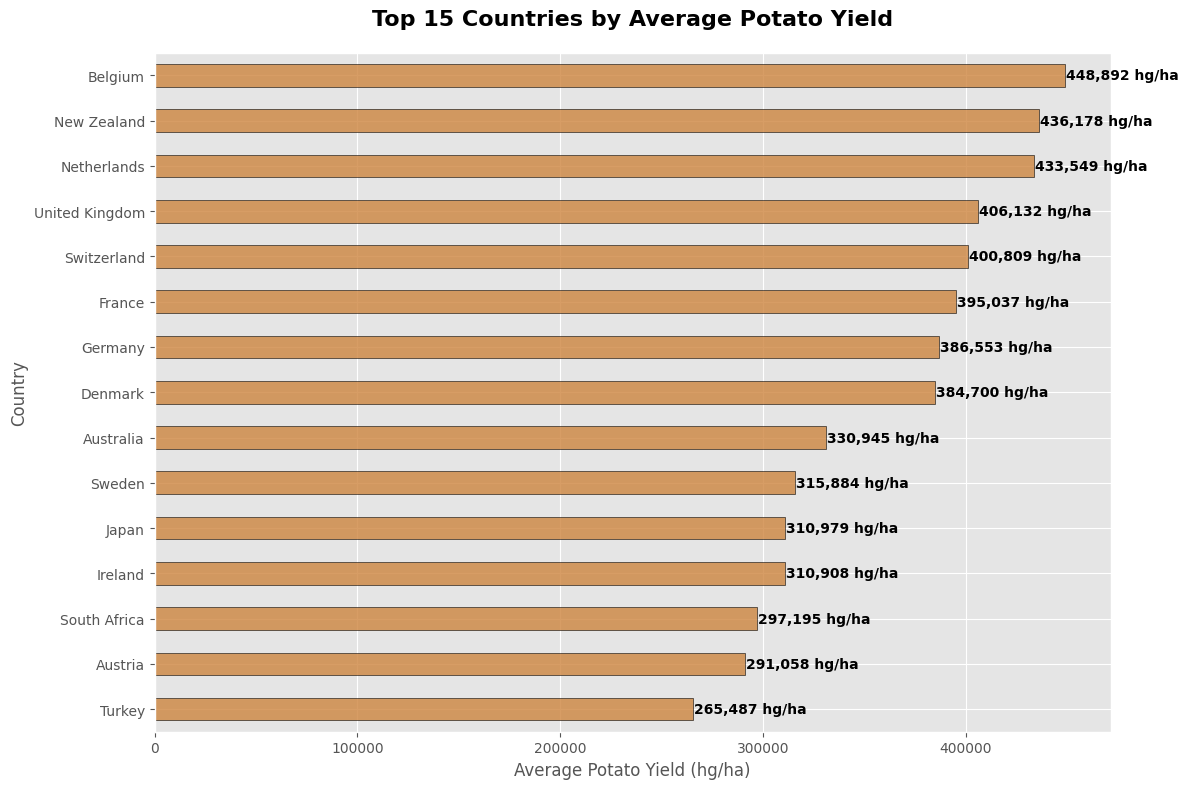

In [70]:
# Top countries by average potato yield
plt.figure(figsize=(12,8))

potato_yield = df[df['Item'] == 'Potatoes'].groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(15)

potato_yield.plot(kind='barh', color='#CD853F', edgecolor='black', alpha=0.8)
plt.title('Top 15 Countries by Average Potato Yield', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Potato Yield (hg/ha)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add value labels on the bars
for i, v in enumerate(potato_yield):
    plt.text(v + 500, i, f'{v:,.0f} hg/ha', va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

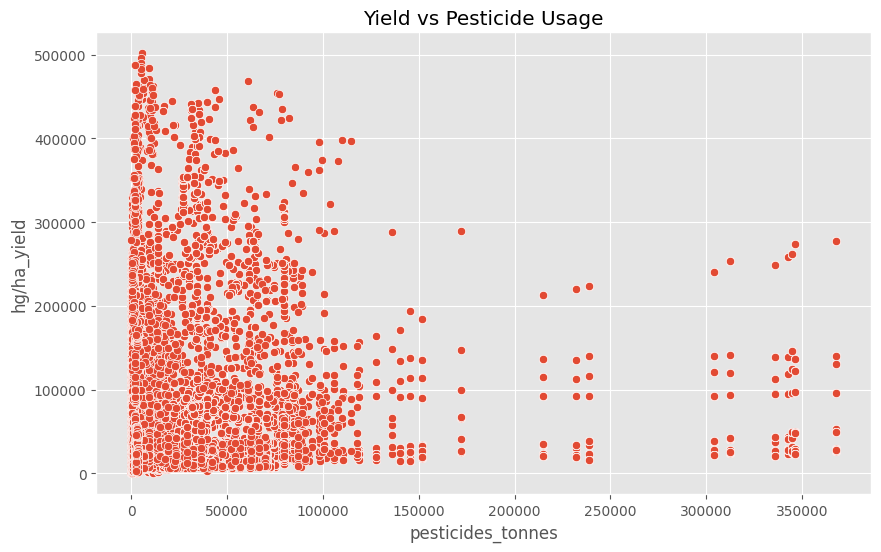

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pesticides_tonnes', y='hg/ha_yield')
plt.title("Yield vs Pesticide Usage")
plt.show()

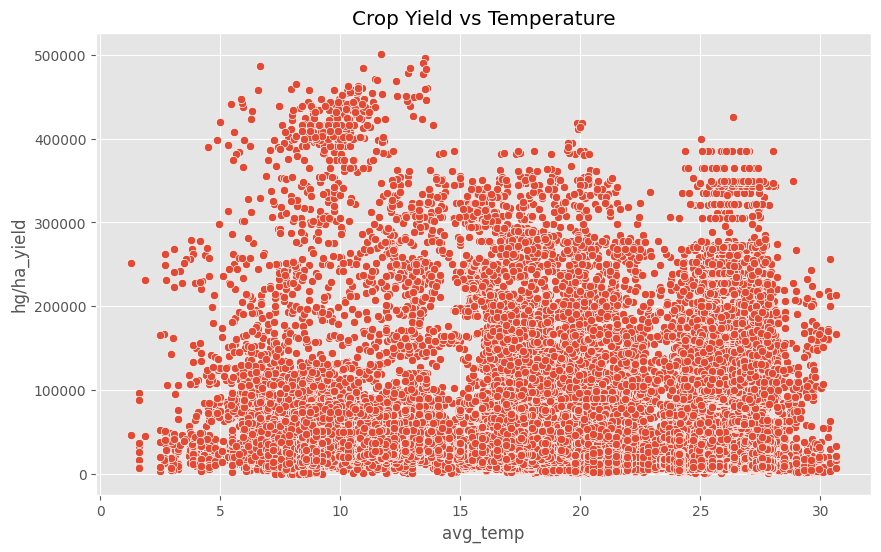

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='avg_temp', y='hg/ha_yield')
plt.title("Crop Yield vs Temperature")
plt.show()

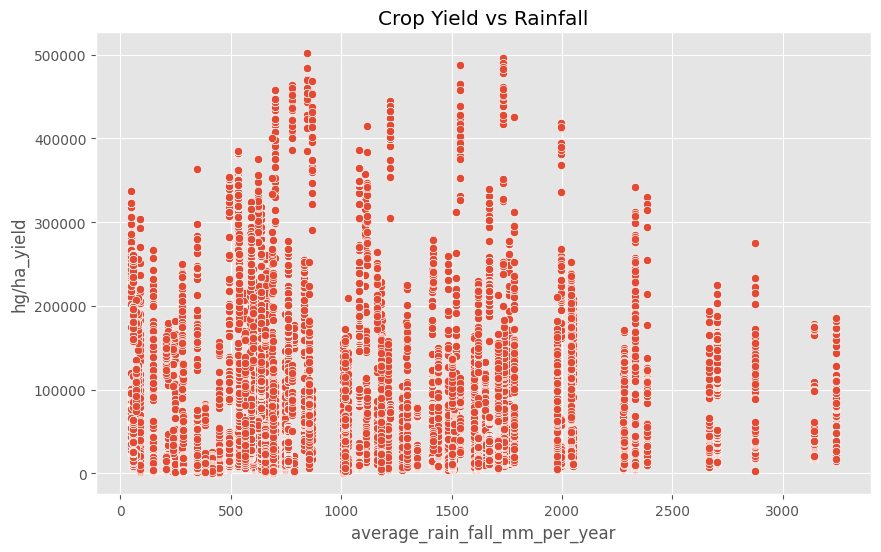

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='hg/ha_yield')
plt.title("Crop Yield vs Rainfall")
plt.show()

In [77]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [78]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [79]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [80]:
df = df[col]

In [81]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [87]:
x = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [88]:
x.shape

(25932, 6)

In [89]:
y.shape

(25932,)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

In [92]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy  = preprocesser.fit_transform(X_test)

In [93]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

In [102]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [104]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

# Models without Ridge to avoid the scipy compatibility issue
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(max_iter=5000, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

print("MODEL PERFORMANCE SUMMARY")
print("="*50)

for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred = md.predict(X_test_dummy)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: mae : {mae} score : {r2}")

MODEL PERFORMANCE SUMMARY
Linear Regression: mae : 29897.28483810378 score : 0.7472732519282185
Lasso: mae : 29883.828737800126 score : 0.7472941969142328
Decision Tree: mae : 5416.101600154232 score : 0.9676585419330868
KNN: mae : 4679.874725274726 score : 0.9846231501994461
Random Forest: mae : 5101.5888991710035 score : 0.9808953146149024


In [105]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 77391.])

In [106]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [107]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


# Predictive System


In [108]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [109]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

In [110]:
result

36613.0

In [112]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [113]:
# Train the Decision Tree model
print("Step 2: Training the model...")
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_dummy, y_train)

# Check model performance
y_pred = dtr.predict(X_test_dummy)
print(f"✅ Model trained successfully!")
print(f"📊 R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"📊 MAE: {mean_absolute_error(y_test, y_pred):,.2f}")

Step 2: Training the model...
✅ Model trained successfully!
📊 R² Score: 0.9677
📊 MAE: 5,416.10


In [114]:
print("\nStep 3: Saving model and preprocessor...")

# Save the trained model
with open('crop_yield_model.pkl', 'wb') as model_file:
    pickle.dump(dtr, model_file)

# Save the preprocessor
with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocesser, preprocessor_file)

print("✅ Model saved as 'crop_yield_model.pkl'")
print("✅ Preprocessor saved as 'preprocessor.pkl'")


Step 3: Saving model and preprocessor...
✅ Model saved as 'crop_yield_model.pkl'
✅ Preprocessor saved as 'preprocessor.pkl'


In [115]:
print("\nStep 4: Saving model information...")

# Create model info dictionary
model_info = {
    'feature_names': preprocesser.get_feature_names_out().tolist(),
    'model_type': 'DecisionTreeRegressor',
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'input_columns': ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'],
    'target_column': 'hg/ha_yield',
    'performance': {
        'r2_score': float(r2_score(y_test, y_pred)),
        'mae': float(mean_absolute_error(y_test, y_pred))
    }
}

# Save model info
with open('model_info.pkl', 'wb') as info_file:
    pickle.dump(model_info, info_file)

print("✅ Model info saved as 'model_info.pkl'")


Step 4: Saving model information...
✅ Model info saved as 'model_info.pkl'


In [116]:
print("\nStep 5: Verifying saved files...")

# Check if files exist and their sizes
files_to_check = ['crop_yield_model.pkl', 'preprocessor.pkl', 'model_info.pkl']

for file in files_to_check:
    if os.path.exists(file):
        size_kb = os.path.getsize(file) / 1024
        print(f"✅ {file}: {size_kb:.2f} KB")
    else:
        print(f"❌ {file}: File not found")


Step 5: Verifying saved files...
✅ crop_yield_model.pkl: 1673.24 KB
✅ preprocessor.pkl: 3.02 KB
✅ model_info.pkl: 3.59 KB


In [117]:
print("\nStep 6: Creating prediction function...")

def predict_crop_yield(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    """
    Load saved model and preprocessor to make predictions
    """
    try:
        # Load the model
        with open('crop_yield_model.pkl', 'rb') as file:
            model = pickle.load(file)
        
        # Load the preprocessor
        with open('preprocessor.pkl', 'rb') as file:
            preprocessor = pickle.load(file)
        
        # Create input DataFrame (MUST be in same order as training)
        input_data = pd.DataFrame({
            'Year': [Year],
            'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
            'pesticides_tonnes': [pesticides_tonnes],
            'avg_temp': [avg_temp],
            'Area': [Area],
            'Item': [Item]
        })
        
        # Transform input data
        transformed_data = preprocessor.transform(input_data)
        
        # Make prediction
        prediction = model.predict(transformed_data)[0]
        
        return prediction
        
    except Exception as e:
        print(f"❌ Prediction error: {e}")
        return None

print("✅ Prediction function created!")


Step 6: Creating prediction function...
✅ Prediction function created!


In [118]:
print("\nStep 7: Testing the saved model...")

# Test prediction
test_prediction = predict_crop_yield(1990, 1485.0, 121.0, 16.37, 'Albania', 'Maize')

if test_prediction is not None:
    print(f"🌱 TEST PREDICTION SUCCESSFUL!")
    print(f"📍 Area: Albania")
    print(f"🌾 Crop: Maize")
    print(f"📅 Year: 1990")
    print(f"📈 Predicted Yield: {test_prediction:,.2f} hg/ha")
    
    # Compare with original prediction
    original_features = np.array([[1990, 1485.0, 121.0, 16.37, 'Albania', 'Maize']], dtype=object)
    original_transformed = preprocesser.transform(original_features)
    original_prediction = dtr.predict(original_transformed)[0]
    
    print(f"🔍 Original model prediction: {original_prediction:,.2f} hg/ha")
    print(f"✅ Difference: {abs(test_prediction - original_prediction):.2f} hg/ha")
else:
    print("❌ Test prediction failed")


Step 7: Testing the saved model...
🌱 TEST PREDICTION SUCCESSFUL!
📍 Area: Albania
🌾 Crop: Maize
📅 Year: 1990
📈 Predicted Yield: 36,613.00 hg/ha
🔍 Original model prediction: 36,613.00 hg/ha
✅ Difference: 0.00 hg/ha


In [119]:
print("\nStep 8: Complete usage example...")

def complete_prediction_pipeline(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    """
    Complete pipeline from loading to prediction
    """
    print("🔍 Making prediction...")
    print(f"   Year: {Year}")
    print(f"   Rainfall: {average_rain_fall_mm_per_year} mm")
    print(f"   Pesticides: {pesticides_tonnes} tonnes")
    print(f"   Temperature: {avg_temp}°C")
    print(f"   Area: {Area}")
    print(f"   Crop: {Item}")
    
    prediction = predict_crop_yield(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
    
    if prediction is not None:
        print(f"\n🎯 PREDICTION RESULT:")
        print(f"   Predicted Yield: {prediction:,.2f} hg/ha")
        print(f"   Equivalent: {prediction/10000:,.2f} tons/hectare")
        return prediction
    else:
        print("❌ Prediction failed")
        return None

# Test complete pipeline
print("Testing complete pipeline...")
complete_prediction_pipeline(1990, 1485.0, 121.0, 16.37, 'Albania', 'Maize')


Step 8: Complete usage example...
Testing complete pipeline...
🔍 Making prediction...
   Year: 1990
   Rainfall: 1485.0 mm
   Pesticides: 121.0 tonnes
   Temperature: 16.37°C
   Area: Albania
   Crop: Maize

🎯 PREDICTION RESULT:
   Predicted Yield: 36,613.00 hg/ha
   Equivalent: 3.66 tons/hectare


36613.0

In [120]:
print("\n" + "="*50)
print("🎉 PICKLE FILES CREATION COMPLETE!")
print("="*50)
print("📁 Files created:")
print("   1. crop_yield_model.pkl - Your trained model")
print("   2. preprocessor.pkl - Data preprocessor")
print("   3. model_info.pkl - Model metadata")
print("\n🚀 You can now:")
print("   - Deploy this model in applications")
print("   - Share the model with others")
print("   - Use it for future predictions without retraining")
print("="*50)


🎉 PICKLE FILES CREATION COMPLETE!
📁 Files created:
   1. crop_yield_model.pkl - Your trained model
   2. preprocessor.pkl - Data preprocessor
   3. model_info.pkl - Model metadata

🚀 You can now:
   - Deploy this model in applications
   - Share the model with others
   - Use it for future predictions without retraining
